In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import datetime as dt
import statsmodels.formula.api as smf
import geopandas


In [76]:
#Webscraping Singapore's inflation data from rateinflation.com
inflation_df = pd.read_html(requests.get('https://www.rateinflation.com/inflation-rate/singapore-historical-inflation-rate/').text)

#Select inflation data
inflation_df = inflation_df[0]

#Get data from 2017-2022 in reverse order
inflation_df = inflation_df.loc[5::-1]

#Create values for x-axis for months
months = pd.period_range("2017-01", "2022-09" , freq='M')

#Append inflation data to a list
lst = []
annual = []
for i in inflation_df.to_numpy():
    #Getting only monthly inflation rate from data table
    lst.extend(i[1:-1])
    annual.append(i[-1])


#Removing last 3 months in 2022 because no data yet
lst = lst[:-3]

#Removing % from the inflation data and changing data type to float
lst = [float(i[:-1]) for i in lst]




In [77]:
#Inflation Data
inflation_data = {}
for t, rate in zip(months,lst):
    inflation_data[str(t)] = rate

inflation_data

{'2017-01': 0.559,
 '2017-02': 0.659,
 '2017-03': 0.658,
 '2017-04': 0.404,
 '2017-05': 1.406,
 '2017-06': 0.515,
 '2017-07': 0.563,
 '2017-08': 0.404,
 '2017-09': 0.375,
 '2017-10': 0.373,
 '2017-11': 0.631,
 '2017-12': 0.375,
 '2018-01': 0.009,
 '2018-02': 0.483,
 '2018-03': 0.237,
 '2018-04': 0.072,
 '2018-05': 0.354,
 '2018-06': 0.555,
 '2018-07': 0.641,
 '2018-08': 0.729,
 '2018-09': 0.724,
 '2018-10': 0.706,
 '2018-11': 0.29,
 '2018-12': 0.465,
 '2019-01': 0.355,
 '2019-02': 0.454,
 '2019-03': 0.678,
 '2019-04': 0.931,
 '2019-05': 0.881,
 '2019-06': 0.536,
 '2019-07': 0.229,
 '2019-08': 0.432,
 '2019-09': 0.395,
 '2019-10': 0.486,
 '2019-11': 0.647,
 '2019-12': 0.761,
 '2020-01': 0.822,
 '2020-02': 0.326,
 '2020-03': -0.039,
 '2020-04': -0.743,
 '2020-05': -0.842,
 '2020-06': -0.538,
 '2020-07': -0.411,
 '2020-08': -0.401,
 '2020-09': -0.008,
 '2020-10': -0.219,
 '2020-11': -0.149,
 '2020-12': 0.024,
 '2021-01': 0.236,
 '2021-02': 0.734,
 '2021-03': 1.307,
 '2021-04': 2.079,
 '20

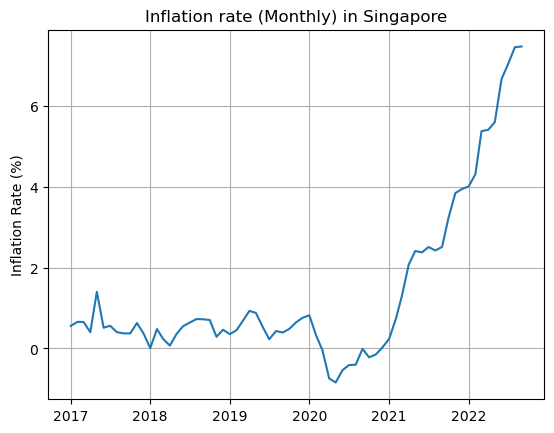

In [78]:
#Plotting the inflation rate in Singapore
plt.plot(months.to_timestamp(),lst)
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation rate (Monthly) in Singapore")
plt.grid((0.9,0.9,0.9))

In [79]:
DATA_DIR = "Data"

RESIDENTIAL_CSV = f"{DATA_DIR}/ExecutiveCondoTransaction.csv"
COMMERCIAL_CSV = F"{DATA_DIR}/OfficeTransaction.csv"
INDUSTRIAL_CSV = F"{DATA_DIR}/WarehouseTransaction.csv"

In [84]:
residential_df:pd.DataFrame = pd.read_csv(RESIDENTIAL_CSV)
commercial_df:pd.DataFrame = pd.read_csv(COMMERCIAL_CSV)
industrial_df:pd.DataFrame = pd.read_csv(INDUSTRIAL_CSV)

ALL_DFS = {
    "residential": residential_df,
    "commercial": commercial_df,
    "industrial": industrial_df
}

for df_name in ALL_DFS:
    df = ALL_DFS[df_name]
    df = df.dropna()
    df["Sale Date"] = pd.DatetimeIndex(df["Sale Date"]).year

    df["Unit Price ($ PSF)"] = df["Unit Price ($ PSF)"].replace(",", "", regex=True)
    df["Unit Price ($ PSF)"] = pd.to_numeric(df["Unit Price ($ PSF)"], errors = 'coerce')
    ALL_DFS[df_name] = df


In [ ]:
all_dfs_groupby_sale_date = {}
for df_name in ALL_DFS:
    all_dfs_groupby_sale_date[df_name] = ALL_DFS[df_name].groupby("Sale Date").mean(numeric_only = True)

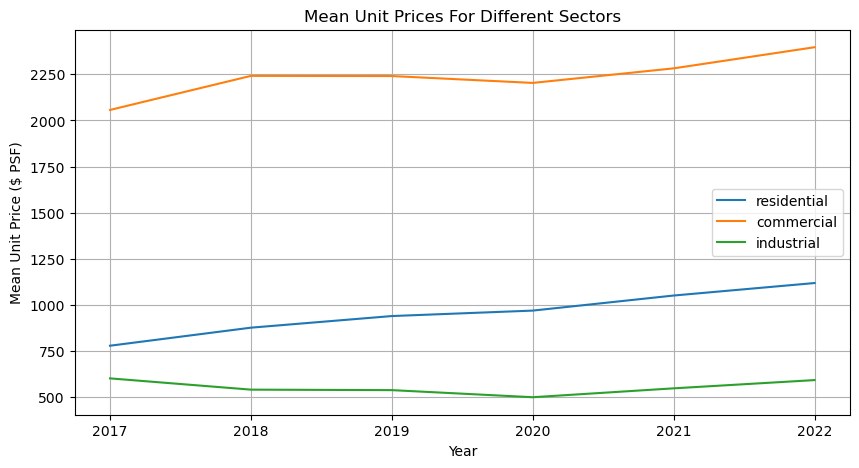

In [ ]:
plt.figure(figsize=(10,5))
for i, df_name in enumerate(all_dfs_groupby_sale_date):
    y = all_dfs_groupby_sale_date[df_name]["Unit Price ($ PSF)"]
    # df = ALL_DFS[df_name].mean()
    # y = df.groupby("Sale Date").mean()["Unit Price ($ PSF)"]
    plt.plot(y, label=df_name)
    plt.legend()
    
plt.title('Mean Unit Prices For Different Sectors')
plt.xlabel('Year')
plt.ylabel('Mean Unit Price ($ PSF)')
plt.grid()
plt.show()


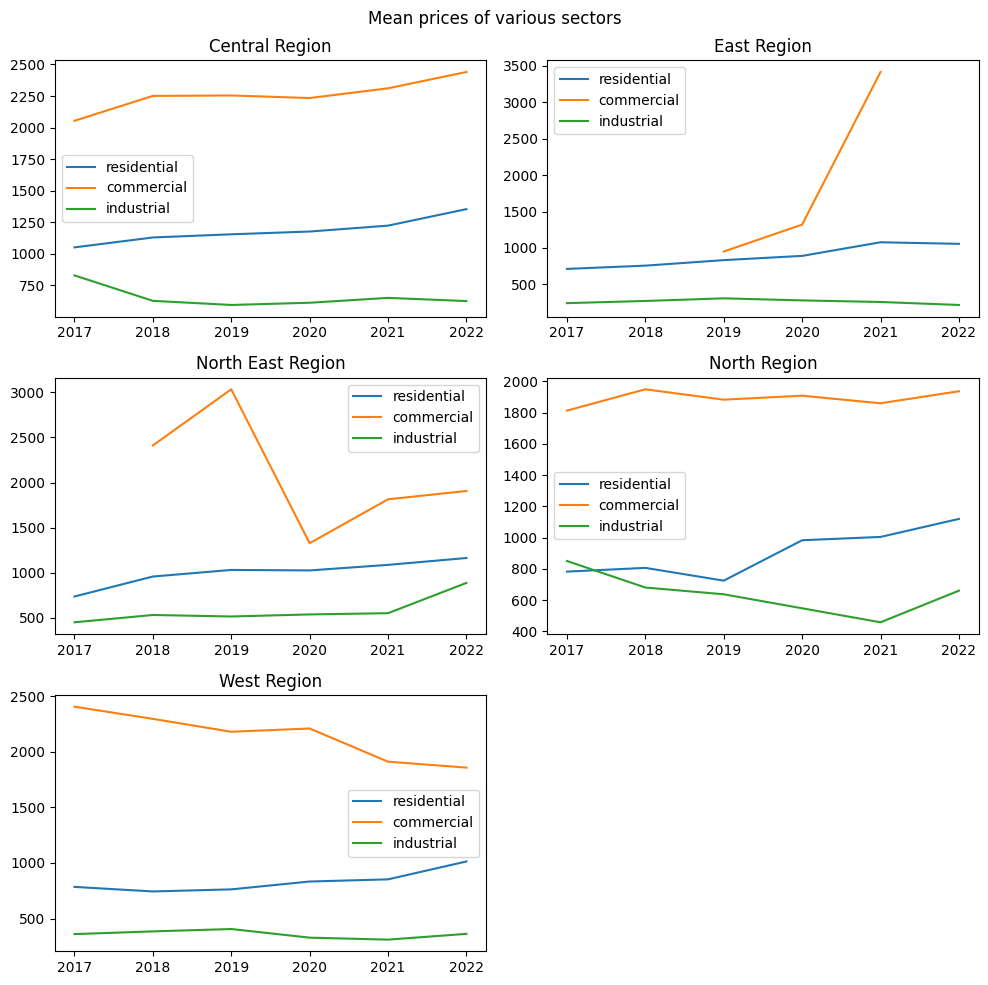

In [ ]:
planning_regions = [
    "Central Region",
    "East Region",
    "North East Region",
    "North Region",
    "West Region"
]
n_rows = 3
n_columns = 2   

fig, axs = plt.subplots(n_rows, n_columns, figsize = (10,10))
fig.suptitle('Mean prices of various sectors')

for subplot_index, planning_region in enumerate(planning_regions):
    row = subplot_index//n_columns
    column = subplot_index % n_columns
    
    for i, df_name in enumerate(ALL_DFS):
        sector_df = ALL_DFS[df_name]
        df = sector_df.loc[sector_df["Planning Region"] == planning_region]
        df = df.groupby("Sale Date").mean(numeric_only = True)
        y = df["Unit Price ($ PSF)"]
        
        subplot = axs[row, column]
        subplot.plot(y, label=df_name)
        subplot.title.set_text(planning_region)
        subplot.legend()

if num_empty_plots := (n_rows * n_columns) - len(planning_regions):
    for i in range(num_empty_plots):
        fig.delaxes(axs[-1,-1-i])

plt.tight_layout()
plt.show()


In [ ]:
ALL_DFS["residential"].head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Property Type,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
0,BLOSSOM RESIDENCES,"750,000",753.48,995,2019,30 SEGAR ROAD #04-01,Resale,Strata,70,"10,714",...,Executive Condominium,1,99 yrs from 02/03/2011,2014,Private,677721,23,67,West Region,Bukit Panjang
1,PIERMONT GRAND,"1,478,400","1,334.74",1108,2019,26 SUMANG WALK #05-11,New Sale,Strata,124,"11,923",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol
2,AUSTVILLE RESIDENCES,"860,000","1,033.34",832,2019,19 SENGKANG EAST AVENUE #05-19,Resale,Strata,96,"8,958",...,Executive Condominium,1,99 yrs from 24/08/2010,2014,Private,544808,19,54,North East Region,Sengkang
3,RIVERPARC RESIDENCE,"995,000","1,076.40",924,2019,96 PUNGGOL DRIVE #13-15,Resale,Strata,100,"9,950",...,Executive Condominium,1,99 yrs from 27/12/2010,2014,HDB,828797,19,82,North East Region,Punggol
4,PIERMONT GRAND,"1,680,200","1,506.96",1115,2019,26 SUMANG WALK #07-10,New Sale,Strata,140,"12,001",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol


In [ ]:
display(sector_df = ALL_DFS["residential"].head())
# sector_df["Planning Region"].head()

In [ ]:
residential_df.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Property Type,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
0,BLOSSOM RESIDENCES,"750,000",753.48,995,1-Oct-19,30 SEGAR ROAD #04-01,Resale,Strata,70,"10,714",...,Executive Condominium,1,99 yrs from 02/03/2011,2014,Private,677721,23,67,West Region,Bukit Panjang
1,PIERMONT GRAND,"1,478,400","1,334.74","1,108",1-Oct-19,26 SUMANG WALK #05-11,New Sale,Strata,124,"11,923",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol
2,AUSTVILLE RESIDENCES,"860,000","1,033.34",832,1-Oct-19,19 SENGKANG EAST AVENUE #05-19,Resale,Strata,96,"8,958",...,Executive Condominium,1,99 yrs from 24/08/2010,2014,Private,544808,19,54,North East Region,Sengkang
3,RIVERPARC RESIDENCE,"995,000","1,076.40",924,2-Oct-19,96 PUNGGOL DRIVE #13-15,Resale,Strata,100,"9,950",...,Executive Condominium,1,99 yrs from 27/12/2010,2014,HDB,828797,19,82,North East Region,Punggol
4,PIERMONT GRAND,"1,680,200","1,506.96","1,115",2-Oct-19,26 SUMANG WALK #07-10,New Sale,Strata,140,"12,001",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol


In [ ]:
for df in ALL_DFS.values():
    print(df)
    break

               Project Name Transacted Price ($) Area (SQFT)  \
0        BLOSSOM RESIDENCES              750,000      753.48   
1            PIERMONT GRAND            1,478,400    1,334.74   
2      AUSTVILLE RESIDENCES              860,000    1,033.34   
3       RIVERPARC RESIDENCE              995,000    1,076.40   
4            PIERMONT GRAND            1,680,200    1,506.96   
...                     ...                  ...         ...   
12112              EASTVALE            1,050,000    1,097.93   
12113                 PRIVE            1,360,000    1,097.93   
12114           THE TERRACE            1,238,000    1,001.05   
12115            1 CANBERRA            1,020,000      947.23   
12116                 PRIVE              990,500      828.83   

       Unit Price ($ PSF)  Sale Date                         Address  \
0                     995       2019            30 SEGAR ROAD #04-01   
1                    1108       2019           26 SUMANG WALK #05-11   
2              

In [ ]:
residential_df.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Property Type,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
0,BLOSSOM RESIDENCES,"750,000",753.48,995,1-Oct-19,30 SEGAR ROAD #04-01,Resale,Strata,70,"10,714",...,Executive Condominium,1,99 yrs from 02/03/2011,2014,Private,677721,23,67,West Region,Bukit Panjang
1,PIERMONT GRAND,"1,478,400","1,334.74","1,108",1-Oct-19,26 SUMANG WALK #05-11,New Sale,Strata,124,"11,923",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol
2,AUSTVILLE RESIDENCES,"860,000","1,033.34",832,1-Oct-19,19 SENGKANG EAST AVENUE #05-19,Resale,Strata,96,"8,958",...,Executive Condominium,1,99 yrs from 24/08/2010,2014,Private,544808,19,54,North East Region,Sengkang
3,RIVERPARC RESIDENCE,"995,000","1,076.40",924,2-Oct-19,96 PUNGGOL DRIVE #13-15,Resale,Strata,100,"9,950",...,Executive Condominium,1,99 yrs from 27/12/2010,2014,HDB,828797,19,82,North East Region,Punggol
4,PIERMONT GRAND,"1,680,200","1,506.96","1,115",2-Oct-19,26 SUMANG WALK #07-10,New Sale,Strata,140,"12,001",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol


# Regression

In [122]:
regression_residential_df = residential_df[["Unit Price ($ PSF)","Sale Date"]]
regression_residential_df = regression_residential_df.rename(columns={"Unit Price ($ PSF)": "Price", "Sale Date":"Date"})

regression_residential_df["Price"] = regression_residential_df["Price"].replace(",", "", regex=True)
regression_residential_df['Price'] = pd.to_numeric(regression_residential_df['Price'], errors = 'coerce')

regression_residential_df['Date'] = pd.to_datetime(regression_residential_df['Date'])
regression_residential_df['month_year'] = regression_residential_df['Date'].dt.to_period('M')
regression_residential_df['month_year'] = regression_residential_df["month_year"].astype('str')
regression_residential_df['rate'] = regression_residential_df['month_year'].apply(lambda x: inflation_data[x])

In [123]:
regression_industrial_df = industrial_df[["Unit Price ($ PSF)","Sale Date"]]
regression_industrial_df = regression_industrial_df.rename(columns={"Unit Price ($ PSF)": "Price", "Sale Date": "Date"})
regression_industrial_df["Price"] = regression_industrial_df["Price"].replace(",", "", regex=True)
regression_industrial_df['Price'] = pd.to_numeric(regression_industrial_df['Price'], errors ='coerce')
regression_industrial_df['Date'] = pd.to_datetime(regression_industrial_df['Date'])
regression_industrial_df['month_year'] = regression_industrial_df['Date'].dt.to_period('M')
regression_industrial_df['month_year'] = regression_industrial_df["month_year"].astype('str')
regression_industrial_df['rate'] = regression_industrial_df['month_year'].apply(lambda x: inflation_data[x])

In [145]:
regression_commercial_df = commercial_df[["Unit Price ($ PSF)","Sale Date"]]
regression_commercial_df = regression_commercial_df.rename(columns={"Unit Price ($ PSF)": "Price", "Sale Date": "Date"})
regression_commercial_df["Price"] = regression_commercial_df["Price"].replace(",", "", regex=True)
regression_commercial_df['Price'] = pd.to_numeric(regression_commercial_df['Price'], errors ='coerce')
regression_commercial_df['Date'] = pd.to_datetime(regression_commercial_df['Date'])
regression_commercial_df['month_year'] = regression_commercial_df['Date'].dt.to_period('M')
regression_commercial_df['month_year'] = regression_commercial_df["month_year"].astype('str')
regression_commercial_df['rate'] = regression_commercial_df['month_year'].apply(lambda x: inflation_data[x])

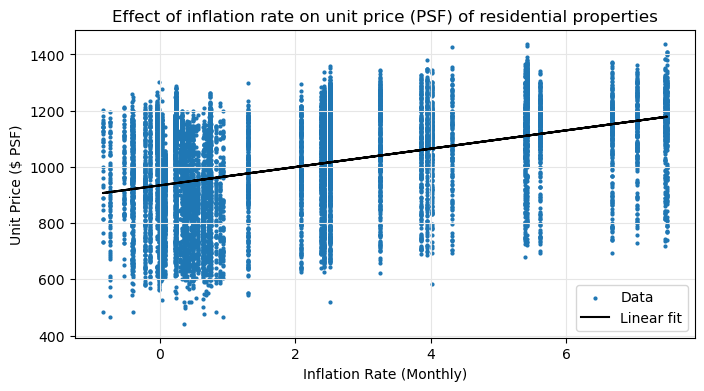

In [144]:
# Linear relationship (Linear trendline)
reg1 = smf.ols("Price ~ rate ", data = regression_residential_df).fit()
regression_residential_df['fit_price'] = reg1.params[0] + reg1.params[1]*regression_residential_df['rate']

plt.figure(figsize = (8,4))
plt.subplot(1,1,1)
plt.scatter(regression_residential_df['rate'], regression_residential_df['Price'],s=4, label = 'Data')
plt.plot(regression_residential_df['rate'],regression_residential_df['fit_price'],color=(0,0,0), label = 'Linear fit')
plt.title('Effect of inflation rate on unit price (PSF) of residential properties')
plt.xlabel('Inflation Rate (Monthly)')
plt.ylabel('Unit Price ($ PSF)')
plt.legend()
plt.grid(color=(.9,.9,.9))
plt.show()


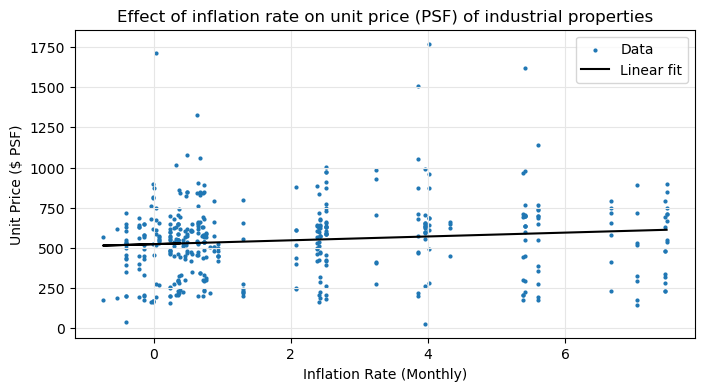

In [143]:
reg2 = smf.ols("Price ~ rate ", data = regression_industrial_df).fit()
regression_industrial_df['fit_price'] = reg2.params[0] + reg2.params[1]*regression_industrial_df['rate']

plt.figure(figsize = (8,4))
plt.subplot(1,1,1)
plt.scatter(regression_industrial_df['rate'], regression_industrial_df['Price'],s=4, label = 'Data')
plt.plot(regression_industrial_df['rate'],regression_industrial_df['fit_price'],color=(0,0,0), label = 'Linear fit')
plt.title('Effect of inflation rate on unit price (PSF) of industrial properties')
plt.xlabel('Inflation Rate (Monthly)')
plt.ylabel('Unit Price ($ PSF)')
plt.legend()
plt.grid(color=(.9,.9,.9))
plt.show()


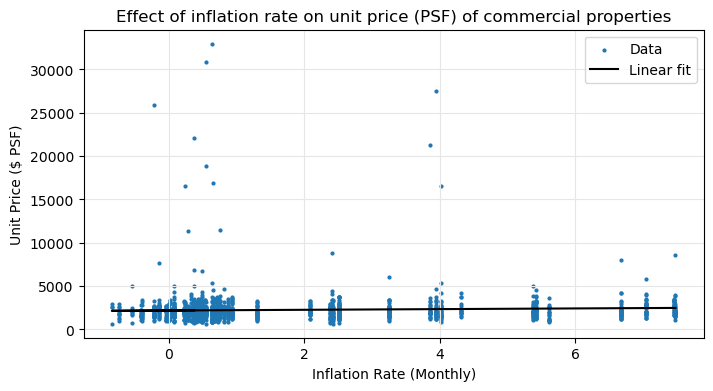

In [150]:
reg3 = smf.ols("Price ~ rate ", data = regression_commercial_df).fit()
regression_commercial_df['fit_price'] = reg3.params[0] + reg3.params[1]*regression_commercial_df['rate']

plt.figure(figsize = (8,4))
plt.subplot(1,1,1)
plt.scatter(regression_commercial_df['rate'], regression_commercial_df['Price'],s=4, label = 'Data')
plt.plot(regression_commercial_df['rate'],regression_commercial_df['fit_price'],color=(0,0,0), label = 'Linear fit')
plt.title('Effect of inflation rate on unit price (PSF) of commercial properties')
plt.xlabel('Inflation Rate (Monthly)')
plt.ylabel('Unit Price ($ PSF)')
plt.legend()
plt.grid(color=(.9,.9,.9))
plt.show()


# Map

Credit:\
Running Onemap API to obtain lat and long data from postal code: https://xang1234.github.io/bubbleproperty/ \
Converting csv to GeoDataFrame: https://www.kaggle.com/code/ujwalkandi/mapping-postal-codes-singapore \
Map of Singapore: https://maps.princeton.edu/catalog/stanford-pg798kr1205 


In [ ]:
# Extracting Unit Price ($ PSF) > 1000 data and Postal Code data from residential dataframe
map_df = residential_df[["Unit Price ($ PSF)", "Postal Code"]]
map_df["Price"] = map_df["Unit Price ($ PSF)"].replace(",", "", regex=True)
map_df['Price'] = pd.to_numeric(map_df['Price'], errors = 'coerce')
map_df = map_df.loc[map_df['Price']>1000]
map_df = map_df.reset_index(drop=True)

C:\Users\JevanGoh\AppData\Local\Temp\ipykernel_21604\2902514914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df["Price"] = map_df["Unit Price ($ PSF)"].replace(",", "", regex=True)
C:\Users\JevanGoh\AppData\Local\Temp\ipykernel_21604\2902514914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df['Price'] = pd.to_numeric(map_df['Price'], errors = 'coerce')


In [ ]:
import time
import json
# import simplejson as json

In [ ]:
# Running postal codes through OneMap API to get latitude and longitude of buildings
# Takes long to run (Around 250 entries per min), so highly recommended to save to another file when done. 
# Saved to mapdata.csv in this case
for i in range(len(map_df)):
    if len(str(map_df['Postal Code'][i]))==5:
        map_df['Postal Code'][i]='0'+map_df['Postal Code'][i]
        
map_df['OnemapLongitude'] = pd.Series(0, index=map_df.index)
map_df['OnemapLatitude'] = pd.Series(0, index=map_df.index)       
map_df['Postal Code'] = map_df['Postal Code'].astype(str)

start=time.time()
for i in range(len(map_df)):
    req=requests.get('https://developers.onemap.sg/commonapi/search?searchVal='+map_df['Postal Code'][i]+'&returnGeom=Y&getAddrDetails=Y&pageNum=1')
    jdata = json.loads(req.text)
    if jdata['found']>=1:
        map_df['OnemapLongitude'][i]=jdata['results'][0]['LONGITUDE']
        map_df['OnemapLatitude'][i]=jdata['results'][0]['LATITUDE']
    else:
        map_df['OnemapLongitude'][i]=float('nan')
        map_df['OnemapLatitude'][i]=float('nan')
    print(f"{i}/{len(map_df)}")
    
print('Time Taken:',time.time()-start)
map_df.to_csv("Data/mapdata.csv")

In [ ]:
# Read latitude and longitude data from generated csv and convert the format into epsg:4326 latitude/longitude coordinate system
df_codes = geopandas.read_file('Data/mapdata.csv')
df = geopandas.GeoDataFrame(df_codes, geometry=geopandas.points_from_xy(df_codes["OnemapLongitude"].astype('float32'), df_codes["OnemapLatitude"].astype('float32')) )
df.crs = {'init': 'epsg:4326'}

# Read the Singapore map
gf0 = geopandas.read_file('zip://data/stanford-pg798kr1205-shapefile.zip')


d:\Anaconda\envs\re2708\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


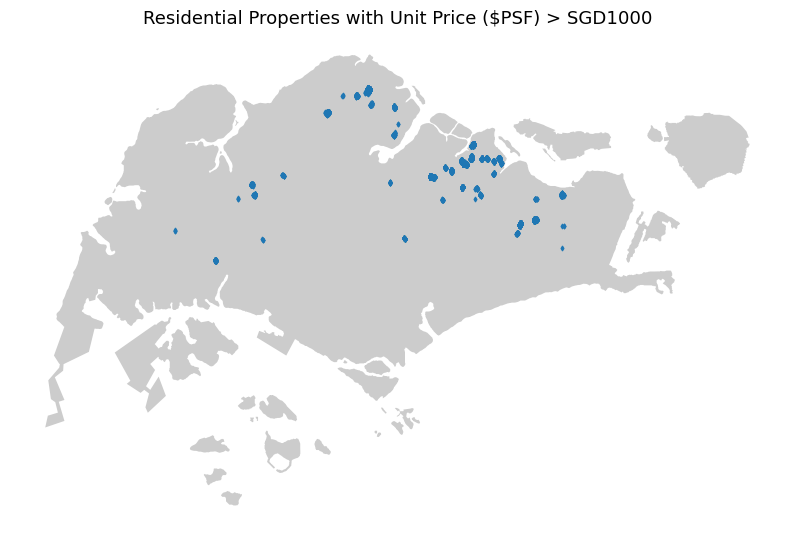

In [ ]:
# Plotting the map figure
fig, axis = plt.subplots(1,1,figsize=(10,10))
gf0.plot(ax=axis, color=(.8,.8,.8))
df.plot(ax = axis,marker='d',markersize=5)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('Residential Properties with Unit Price ($PSF) > SGD1000',fontsize=13)
plt.show()

# Extra Codes

In [ ]:
#Webscraping Singapore's inflation data from macrotrends.net
inflation_df2 = pd.read_html(requests.get('https://www.macrotrends.net/countries/SGP/singapore/inflation-rate-cpi').text)

#Selecting the correct dataframe
inflation_df2 = inflation_df2[1] 

#Renaming the columns
inflation_df2.columns = ['Year', 'Inflation Rate', 'Annual Change']

#Removing the % in the data of Inflation Rate and Annual Change
inflation_df2 = inflation_df2.replace("%","", regex = True)

#Changing all values in dataframe to numeric data
inflation_df2['Year'] = pd.to_numeric(inflation_df2['Year'], errors = 'coerce')
inflation_df2['Inflation Rate'] = pd.to_numeric(inflation_df2['Inflation Rate'], errors = 'coerce')
inflation_df2['Annual Change'] = pd.to_numeric(inflation_df2['Annual Change'], errors = 'coerce')

#Seeing the dataframe
inflation_df2.head()

,Year,Inflation Rate,Annual Change
0,2021,2.30,2.49
1,2020,-0.18,-0.75
2,2019,0.57,0.13
3,2018,0.44,-0.14
4,2017,0.58,1.11


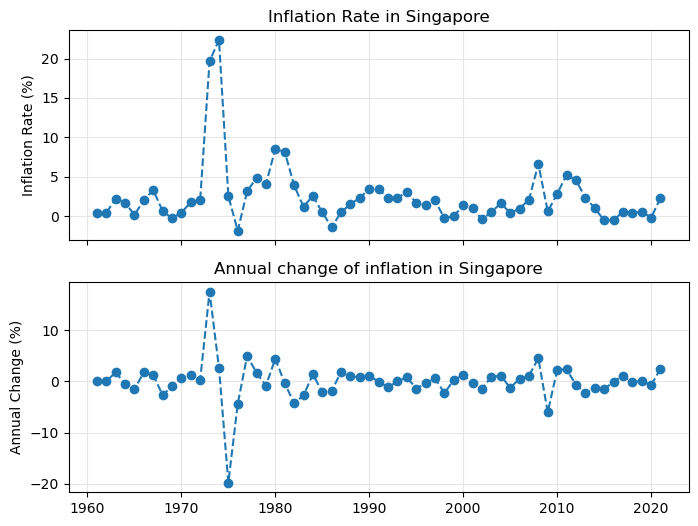

In [ ]:
#Using matplotlib.subplots to plot two figures using webscraped data
#Share the same x axis (Year) for both figures 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6),sharex=True)

#Plotting Figure 1: Inflation Rate in Singapore
ax1.plot(inflation_df2['Year'],inflation_df2['Inflation Rate'],linestyle='dashed',marker='o',markersize=6)
ax1.set_title('Inflation Rate in Singapore')
ax1.set_ylabel('Inflation Rate (%)')
ax1.grid(color=(.9,.9,.9))

#Plotting Figure 2: Annual change of inflation in Singapore
ax2.plot(inflation_df2['Year'],inflation_df2['Annual Change'],linestyle='dashed',marker='o',markersize=6)
ax2.set_title('Annual change of inflation in Singapore')
ax2.set_ylabel('Annual Change (%)')
ax2.grid(color=(.9,.9,.9))

#Using tight layout to look more pr

In [ ]:
residential_df = pd.read_csv("Data/ExecutiveCondoTransaction.csv")
residential_df = residential_df.replace(",","", regex = True)
residential_df['Unit Price ($ PSF)'] = pd.to_numeric(residential_df['Unit Price ($ PSF)'], errors = 'raise')
residential_df['Sale Date'] = pd.to_datetime(residential_df['Sale Date'], infer_datetime_format=True)
residential_df['Sale MY'] = residential_df['Sale Date'].dt.strftime('%Y %m')
residential_region_df = residential_df.groupby(['Planning Region', 'Sale MY'])

residential_central_df = residential_df.loc[residential_df['Planning Region'] == 'Central Region']
residential_central_df = residential_central_df.sort_values(by='Sale MY')
residential_central_df = residential_central_df.groupby('Sale MY').mean()


C:\Users\Ronald Toh\AppData\Local\Temp\ipykernel_6104\3947075145.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  residential_central_df = residential_central_df.groupby('Sale MY').mean()


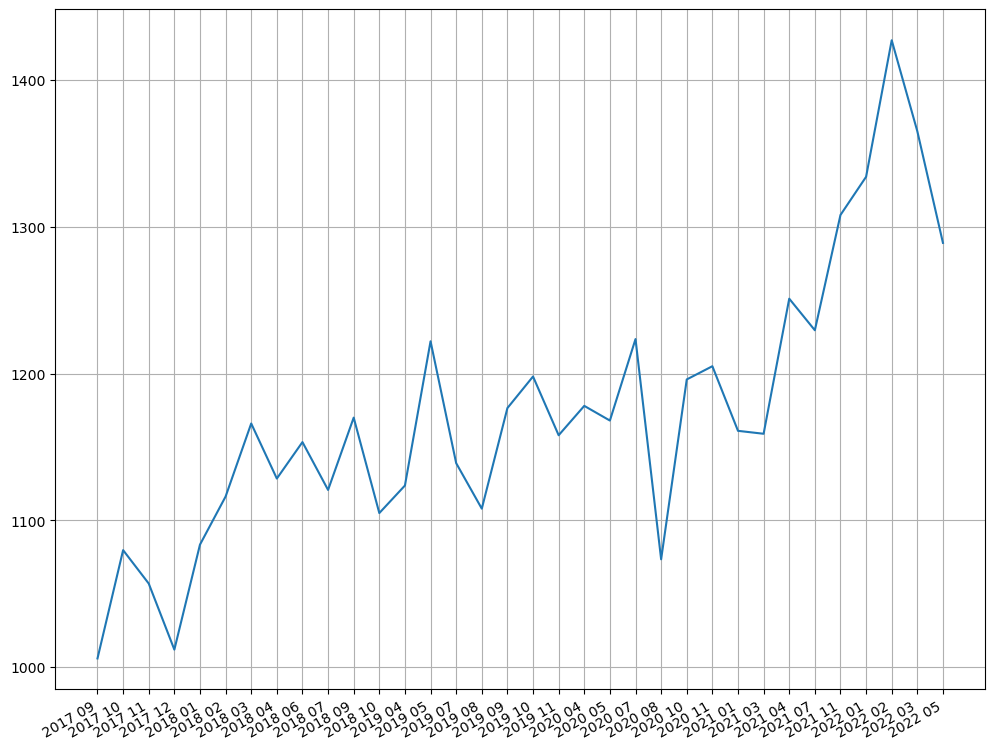

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

# half_year_locator = mdates.MonthLocator(interval=6)
# ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.
fig.autofmt_xdate()
ax.plot(residential_central_df['Unit Price ($ PSF)'])
plt.grid()